In some cases, sampling directly from a probability distribution is difficult.  
One common method to sample from a distribution is inverse transform sampling, which uses the inverse of the cumulative distribution function (CDF).  
However, for many distributions, the inverse CDF is not available in closed form or is expensive to compute.  
In such cases, alternative sampling methods like rejection sampling, MCMC, or specialized algorithms are used instead.  
</br>
In this notebook, I'm implementing and testing various sampling techniques.

In [33]:
import numpy as np
import scipy.stats as st
from typing import Callable
import matplotlib.pyplot as plt

In [111]:
def quadratic_dist(x: float) -> float:
    return np.exp(-x**4)

def rejection_sampling(
        n_samples: int,
        proposal_sampler: np.ndarray,
        proposal_pdf: Callable,
        target_pdf: Callable,
        k: float
    ) -> np.ndarray:
    x = proposal_sampler(n_samples)
    proposal_pdf_dens = proposal_pdf(x)
    u = np.random.uniform(0, 1, n_samples)
    target_pdf_dens = target_pdf(x)

    return x[u <= (target_pdf_dens / (k * proposal_pdf_dens))]

In [121]:
target_pdf = lambda x: np.sin(x)/2
n_samples = 10_000
x_min, x_max = 0, np.pi
proposal_sampler = lambda n: np.random.uniform(x_min, x_max, size=n)
proposal_pdf = lambda x: np.repeat(1/(x_max - x_min), len(x))

inverse_cdf = lambda x: np.arccos(1 - 2*x)

In [125]:
sample_rejection= rejection_sampling(n_samples, proposal_sampler, proposal_pdf, target_pdf, 1)
sample_inverse = inverse_cdf(np.random.uniform(0, 1, n_samples))

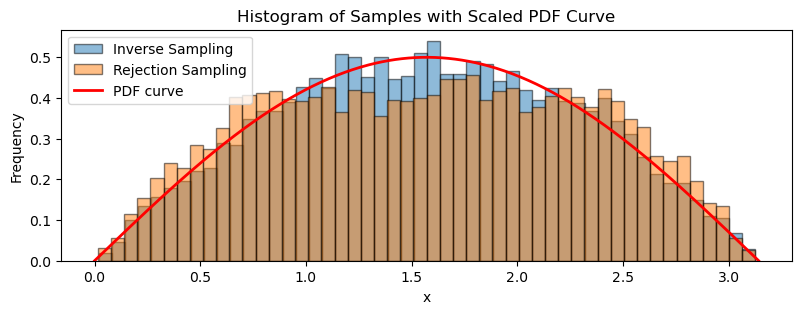

In [127]:
# Plot histogram 
plt.figure(figsize=(3*np.pi, 3))
plt.hist(sample_inverse, bins=50, density=True, alpha=0.5, label='Inverse Sampling', edgecolor='black')
plt.hist(sample_rejection, bins=50, density=True, alpha=0.5, label='Rejection Sampling', edgecolor='black')


# Scale the PDF to match histogram scale
x_vals = np.linspace(x_min, x_max, 500)
pdf_vals = target_pdf(x_vals)

# Plot the scaled PDF curve
plt.plot(x_vals, pdf_vals, 'r-', label='PDF curve', linewidth=2)

plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Samples with Scaled PDF Curve')
plt.legend()
plt.show()